# <Center>Credit default

# Decision Tree - Ensemble Learning

We are going to build a model that predicts if someone who seeks a loan might be a defaulter or a non-defaulter. We have several independent variables like, checking account balance, credit history, purpose, loan amount etc. The dataset is downloaded from UCI Machine Learning Repository.

Dataset & Data Dictionary: https://archive.ics.uci.edu/ml/datasets/statlog+(german+credit+data)

### Import Required Libraries

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree

In [4]:
credit_data=pd.read_csv('C:\\Users\\arkha\\OneDrive\\Desktop\\Machining Learning\\Ensemble_Techniques\\Learnings\\credit.csv')

In [5]:
credit_data.head(10)

,checking_balance,months_loan_duration,credit_history,purpose,amount,savings_balance,employment_duration,percent_of_income,years_at_residence,age,other_credit,housing,existing_loans_count,job,dependents,phone,default
0,< 0 DM,6,critical,furniture/appliances,1169,unknown,> 7 years,4,4,67,none,own,2,skilled,1,yes,no
1,1 - 200 DM,48,good,furniture/appliances,5951,< 100 DM,1 - 4 years,2,2,22,none,own,1,skilled,1,no,yes
2,unknown,12,critical,education,2096,< 100 DM,4 - 7 years,2,3,49,none,own,1,unskilled,2,no,no
3,< 0 DM,42,good,furniture/appliances,7882,< 100 DM,4 - 7 years,2,4,45,none,other,1,skilled,2,no,no
4,< 0 DM,24,poor,car,4870,< 100 DM,1 - 4 years,3,4,53,none,other,2,skilled,2,no,yes
5,unknown,36,good,education,9055,unknown,1 - 4 years,2,4,35,none,other,1,unskilled,2,yes,no
6,unknown,24,good,furniture/appliances,2835,500 - 1000 DM,> 7 years,3,4,53,none,own,1,skilled,1,no,no
7,1 - 200 DM,36,good,car,6948,< 100 DM,1 - 4 years,2,2,35,none,rent,1,management,1,yes,no
8,unknown,12,good,furniture/appliances,3059,> 1000 DM,4 - 7 years,2,4,61,none,own,1,unskilled,1,no,no
9,1 - 200 DM,30,critical,car,5234,< 100 DM,unemployed,4,2,28,none,own,2,management,1,no,yes


From above table we can observe that there are several missing values in the dataset

In [6]:
credit_data.shape

(1000, 17)

There are 1000 rows and 17 columns in the data set

In [7]:
credit_data.describe().T

,count,mean,std,min,25%,50%,75%,max
months_loan_duration,1000.0,20.903,12.058814,4.0,12.0,18.0,24.00,72.0
amount,1000.0,3271.258,2822.736876,250.0,1365.5,2319.5,3972.25,18424.0
percent_of_income,1000.0,2.973,1.118715,1.0,2.0,3.0,4.00,4.0
years_at_residence,1000.0,2.845,1.103718,1.0,2.0,3.0,4.00,4.0
age,1000.0,35.546,11.375469,19.0,27.0,33.0,42.00,75.0
existing_loans_count,1000.0,1.407,0.577654,1.0,1.0,1.0,2.00,4.0
dependents,1000.0,1.155,0.362086,1.0,1.0,1.0,1.00,2.0


In [8]:
credit_data.info() # many columns are of type object i.e. strings. These need to be converted to ordinal type

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 17 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   checking_balance      1000 non-null   object
 1   months_loan_duration  1000 non-null   int64 
 2   credit_history        1000 non-null   object
 3   purpose               1000 non-null   object
 4   amount                1000 non-null   int64 
 5   savings_balance       1000 non-null   object
 6   employment_duration   1000 non-null   object
 7   percent_of_income     1000 non-null   int64 
 8   years_at_residence    1000 non-null   int64 
 9   age                   1000 non-null   int64 
 10  other_credit          1000 non-null   object
 11  housing               1000 non-null   object
 12  existing_loans_count  1000 non-null   int64 
 13  job                   1000 non-null   object
 14  dependents            1000 non-null   int64 
 15  phone                 1000 non-null   o

Lets convert the columns with an 'object' datatype into categorical variables

In [9]:
for i in credit_data.columns:
    if credit_data[i].dtype=='object':
        credit_data[i]=pd.Categorical(credit_data[i])
credit_data.head(10)

,checking_balance,months_loan_duration,credit_history,purpose,amount,savings_balance,employment_duration,percent_of_income,years_at_residence,age,other_credit,housing,existing_loans_count,job,dependents,phone,default
0,< 0 DM,6,critical,furniture/appliances,1169,unknown,> 7 years,4,4,67,none,own,2,skilled,1,yes,no
1,1 - 200 DM,48,good,furniture/appliances,5951,< 100 DM,1 - 4 years,2,2,22,none,own,1,skilled,1,no,yes
2,unknown,12,critical,education,2096,< 100 DM,4 - 7 years,2,3,49,none,own,1,unskilled,2,no,no
3,< 0 DM,42,good,furniture/appliances,7882,< 100 DM,4 - 7 years,2,4,45,none,other,1,skilled,2,no,no
4,< 0 DM,24,poor,car,4870,< 100 DM,1 - 4 years,3,4,53,none,other,2,skilled,2,no,yes
5,unknown,36,good,education,9055,unknown,1 - 4 years,2,4,35,none,other,1,unskilled,2,yes,no
6,unknown,24,good,furniture/appliances,2835,500 - 1000 DM,> 7 years,3,4,53,none,own,1,skilled,1,no,no
7,1 - 200 DM,36,good,car,6948,< 100 DM,1 - 4 years,2,2,35,none,rent,1,management,1,yes,no
8,unknown,12,good,furniture/appliances,3059,> 1000 DM,4 - 7 years,2,4,61,none,own,1,unskilled,1,no,no
9,1 - 200 DM,30,critical,car,5234,< 100 DM,unemployed,4,2,28,none,own,2,management,1,no,yes


In [10]:
credit_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 17 columns):
 #   Column                Non-Null Count  Dtype   
---  ------                --------------  -----   
 0   checking_balance      1000 non-null   category
 1   months_loan_duration  1000 non-null   int64   
 2   credit_history        1000 non-null   category
 3   purpose               1000 non-null   category
 4   amount                1000 non-null   int64   
 5   savings_balance       1000 non-null   category
 6   employment_duration   1000 non-null   category
 7   percent_of_income     1000 non-null   int64   
 8   years_at_residence    1000 non-null   int64   
 9   age                   1000 non-null   int64   
 10  other_credit          1000 non-null   category
 11  housing               1000 non-null   category
 12  existing_loans_count  1000 non-null   int64   
 13  job                   1000 non-null   category
 14  dependents            1000 non-null   int64   
 15  phone

In [11]:
print(credit_data.checking_balance.value_counts())
print('\n')
print(credit_data.credit_history.value_counts())
print('\n')
print(credit_data.purpose.value_counts())
print('\n')
print(credit_data.savings_balance .value_counts())
print('\n')
print(credit_data.employment_duration.value_counts())
print('\n')
print(credit_data.other_credit.value_counts())
print('\n')
print(credit_data.housing.value_counts())
print('\n')
print(credit_data.job.value_counts())
print('\n')
print(credit_data.phone.value_counts())
print('\n')
print(credit_data.default.value_counts())

unknown       394
< 0 DM        274
1 - 200 DM    269
> 200 DM       63
Name: checking_balance, dtype: int64


good         530
critical     293
poor          88
very good     49
perfect       40
Name: credit_history, dtype: int64


furniture/appliances    473
car                     337
business                 97
education                59
renovations              22
car0                     12
Name: purpose, dtype: int64


< 100 DM         603
unknown          183
100 - 500 DM     103
500 - 1000 DM     63
> 1000 DM         48
Name: savings_balance, dtype: int64


1 - 4 years    339
> 7 years      253
4 - 7 years    174
< 1 year       172
unemployed      62
Name: employment_duration, dtype: int64


none     814
bank     139
store     47
Name: other_credit, dtype: int64


own      713
rent     179
other    108
Name: housing, dtype: int64


skilled       630
unskilled     200
management    148
unemployed     22
Name: job, dtype: int64


no     596
yes    404
Name: phone, dtype: int64


### Encoding

In [12]:
replace_structure={
        'checking_balance':{'< 0 DM':1,'1 - 200 DM':2,'> 200 DM':3,'unknown':-1},
        'credit_history':{'critical':1,'poor':2,'good':3,'very good':4,'perfect':5},
        'savings_balance':{'< 100 DM':1,'100 - 500 DM':2,'500 - 1000 DM':3,'> 1000 DM':4,'unknown':-1},
        'employment_duration':{'unemployed':1,'< 1 year':2,'1 - 4 years':3,'4 - 7 years':4,'> 7 years':5},
        'phone':{'no':1,'yes':2},
        'default':{'no':0,'yes':1}                    
        }
OneHotCols=["purpose","housing","other_credit","job"]

In [13]:
credit_data=credit_data.replace(replace_structure)

In [14]:
credit_data=pd.get_dummies(credit_data,columns=OneHotCols,drop_first=True)

In [15]:
credit_data.head()

,checking_balance,months_loan_duration,credit_history,amount,savings_balance,employment_duration,percent_of_income,years_at_residence,age,existing_loans_count,...,purpose_education,purpose_furniture/appliances,purpose_renovations,housing_own,housing_rent,other_credit_none,other_credit_store,job_skilled,job_unemployed,job_unskilled
0,1,6,1,1169,-1,5,4,4,67,2,...,0,1,0,1,0,1,0,1,0,0
1,2,48,3,5951,1,3,2,2,22,1,...,0,1,0,1,0,1,0,1,0,0
2,-1,12,1,2096,1,4,2,3,49,1,...,1,0,0,1,0,1,0,0,0,1
3,1,42,3,7882,1,4,2,4,45,1,...,0,1,0,0,0,1,0,1,0,0
4,1,24,2,4870,1,3,3,4,53,2,...,0,0,0,0,0,1,0,1,0,0


In [16]:
credit_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 25 columns):
 #   Column                        Non-Null Count  Dtype
---  ------                        --------------  -----
 0   checking_balance              1000 non-null   int64
 1   months_loan_duration          1000 non-null   int64
 2   credit_history                1000 non-null   int64
 3   amount                        1000 non-null   int64
 4   savings_balance               1000 non-null   int64
 5   employment_duration           1000 non-null   int64
 6   percent_of_income             1000 non-null   int64
 7   years_at_residence            1000 non-null   int64
 8   age                           1000 non-null   int64
 9   existing_loans_count          1000 non-null   int64
 10  dependents                    1000 non-null   int64
 11  phone                         1000 non-null   int64
 12  default                       1000 non-null   int64
 13  purpose_car                   1000

### Split Data

In [17]:
x=credit_data.drop('default',axis=1)
y=credit_data.pop('default')

In [18]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.30,random_state=1)

### Build Decision Tree Model

We will build our model using the DecisionTreeClassifier function. Using default 'gini' criteria to split. Other option include 'entropy'.

In [19]:
dt=DecisionTreeClassifier(criterion='gini',random_state=1)
dt.fit(x_train,y_train)

DecisionTreeClassifier(random_state=1)

### Model Scores for our Model

In [20]:
print('Train data score:',dt.score(x_train,y_train))

print('Test data score:',dt.score(x_test,y_test))

Train data score: 1.0
Test data score: 0.69


### Visualizing the Decision Tree

In [21]:
train_char_label=['No','Yes']
Credit_Tree_File=open('credit_tree.dot','w')
dot_data=tree.export_graphviz(dt,out_file=Credit_Tree_File,feature_names=list(x_train),class_names=list(train_char_label))
Credit_Tree_File.close()

tree.export_graphviz outputs a .dot file. This is a text file that describes a graph structure using a specific structure. You can plot this by

pasting the contents of that file at http://webgraphviz.com/ 

### Regularised Decision Tree Model

In [22]:
reg_dt_model=DecisionTreeClassifier(criterion='gini',max_depth=3,random_state=1)
reg_dt_model.fit(x_train,y_train)
print('Train data score:',reg_dt_model.score(x_train,y_train))
print('Test data score:',reg_dt_model.score(x_test,y_test))

Train data score: 0.7485714285714286
Test data score: 0.75


In [23]:
train_char_label=['No','Yes']
Credit_Tree_File=open('credit_tree.dot','w')
dot_data=tree.export_graphviz(reg_dt_model,out_file=Credit_Tree_File,feature_names=list(x_train),class_names=list(train_char_label))
Credit_Tree_File.close()

In [24]:
# importance of features in the tree building ( The importance of a feature is computed as the 
#(normalized) total reduction of the criterion brought by that feature. It is also known as the Gini importance )
pd.DataFrame(reg_dt_model.feature_importances_,columns=['Imp'],index=x_train.columns)

,Imp
checking_balance,0.495033
months_loan_duration,0.170676
credit_history,0.166960
amount,0.000000
savings_balance,0.064798
employment_duration,0.046269
percent_of_income,0.000000
years_at_residence,0.000000
age,0.000000
existing_loans_count,0.000000


### Model Evaluation Train & Test data

In [39]:
y_train_predict=reg_dt_model.predict(x_train)
y_test_predict=reg_dt_model.predict(x_test)

In [43]:
from sklearn.metrics import confusion_matrix,classification_report

In [44]:
print(classification_report(y_train,y_train_predict))

              precision    recall  f1-score   support

           0       0.80      0.85      0.83       486
           1       0.61      0.51      0.55       214

    accuracy                           0.75       700
   macro avg       0.70      0.68      0.69       700
weighted avg       0.74      0.75      0.74       700



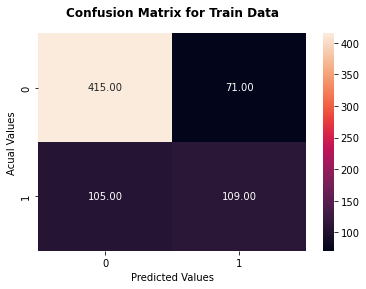

In [57]:
sns.heatmap(confusion_matrix(y_train,y_train_predict),annot=True,fmt='.2f');
plt.title('Confusion Matrix for Train Data',weight='bold',y=1.05)
plt.xlabel('Predicted Values')
plt.ylabel('Acual Values')
plt.show()

In [58]:
print(classification_report(y_test,y_test_predict))

              precision    recall  f1-score   support

           0       0.80      0.86      0.83       214
           1       0.58      0.47      0.52        86

    accuracy                           0.75       300
   macro avg       0.69      0.66      0.67       300
weighted avg       0.74      0.75      0.74       300



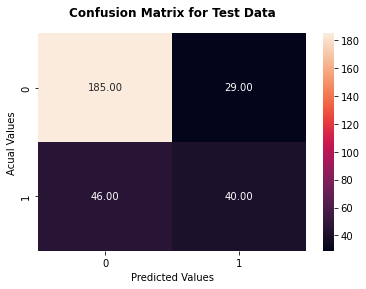

In [59]:
sns.heatmap(confusion_matrix(y_test,y_test_predict),annot=True,fmt='.2f');
plt.title('Confusion Matrix for Test Data',weight='bold',y=1.05)
plt.xlabel('Predicted Values')
plt.ylabel('Acual Values')
plt.show()

### Ensemble Learning - Bagging

In [62]:
from sklearn.ensemble import BaggingClassifier

In [65]:
bgcl=BaggingClassifier(base_estimator=dt,n_estimators=50,random_state=1) 
# It is ok to use complex models in bagging. Particularly because the classifier doesnot expose the entire data to this model.
# It only provides subsets of the base data to the classifier.
bgcl=bgcl.fit(x_train,y_train)

In [66]:
y_test_predict_bgcl=bgcl.predict(x_test)

In [67]:
print(classification_report(y_test,y_test_predict_bgcl))

              precision    recall  f1-score   support

           0       0.80      0.87      0.83       214
           1       0.59      0.45      0.51        86

    accuracy                           0.75       300
   macro avg       0.70      0.66      0.67       300
weighted avg       0.74      0.75      0.74       300



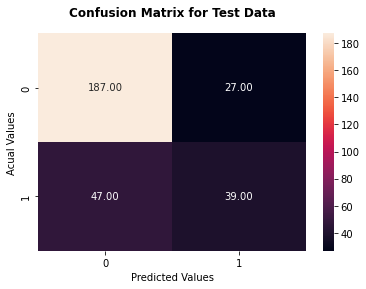

In [68]:
sns.heatmap(confusion_matrix(y_test,y_test_predict_bgcl),annot=True,fmt='.2f');
plt.title('Confusion Matrix for Test Data',weight='bold',y=1.05)
plt.xlabel('Predicted Values')
plt.ylabel('Acual Values')
plt.show()

* The accuracy of the test data increases from 69 to 75 when we compared to base Decision Tree
* However, it shows same accuracy as regularised model

### Ensemble Learning - AdaBoosting

In [69]:
from sklearn.ensemble import AdaBoostClassifier

In [71]:
abcl=BaggingClassifier(n_estimators=50,random_state=1) 
# It is extremely important to use simple models in AdaBoosting.
# Particularly because if the classifier reads the first model very well then others have not much usuage to improve the model.
# By default the AdaBoostClassifier takes the model with max_depth 1(A very simple model)
abcl=abcl.fit(x_train,y_train)

In [72]:
y_test_predict_abcl=abcl.predict(x_test)

In [74]:
print(classification_report(y_test,y_test_predict_abcl))

              precision    recall  f1-score   support

           0       0.80      0.87      0.83       214
           1       0.59      0.45      0.51        86

    accuracy                           0.75       300
   macro avg       0.70      0.66      0.67       300
weighted avg       0.74      0.75      0.74       300



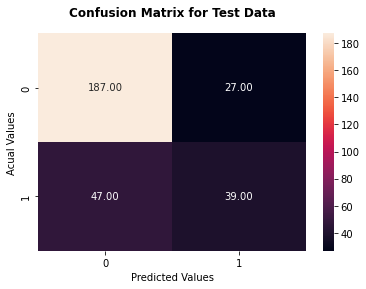

In [73]:
sns.heatmap(confusion_matrix(y_test,y_test_predict_abcl),annot=True,fmt='.2f');
plt.title('Confusion Matrix for Test Data',weight='bold',y=1.05)
plt.xlabel('Predicted Values')
plt.ylabel('Acual Values')
plt.show()

### Ensemble Learning - GradientBoost

In [75]:
from sklearn.ensemble import GradientBoostingClassifier

In [76]:
gbcl=GradientBoostingClassifier(n_estimators=50,random_state=1) 
# It is another ensemble technique which very very simple model.
# However, GradientBoosting is inherently a regression algorithm. But, it can be adopted to do classfication by choosing proper loss function.
# GradientBoostingClassifier by default uses the specific loss function to be able to create some meaningful residuals
gbcl=gbcl.fit(x_train,y_train)

In [77]:
y_test_predict_gbcl=gbcl.predict(x_test)

In [78]:
print(classification_report(y_test,y_test_predict_gbcl))

              precision    recall  f1-score   support

           0       0.78      0.92      0.84       214
           1       0.62      0.35      0.45        86

    accuracy                           0.75       300
   macro avg       0.70      0.63      0.64       300
weighted avg       0.73      0.75      0.73       300



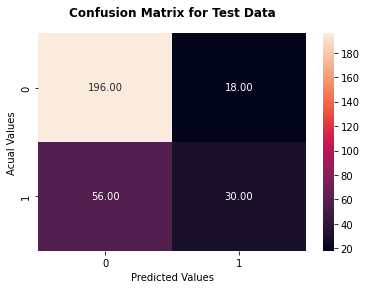

In [79]:
sns.heatmap(confusion_matrix(y_test,y_test_predict_gbcl),annot=True,fmt='.2f');
plt.title('Confusion Matrix for Test Data',weight='bold',y=1.05)
plt.xlabel('Predicted Values')
plt.ylabel('Acual Values')
plt.show()

* AdaBoost and GradientBoosting gives the same accuracy on test data which is also same as accuracy from Bagging
* Recall value decreases in Gradient Boosting when compared to AdaBoost

### Ensemble Learning - Random Forest

In [80]:
from sklearn.ensemble import RandomForestClassifier

In [85]:
rfcl=RandomForestClassifier(n_estimators=50,random_state=1,max_features=12)
# RandomForest classifier is very similar as Bagging.
# Not only taking the sample of rows as subset like Bagging, in RandomForest for every branch of the tree we subset the columns again and allows only to pick one of those subset of columns.
# The less complex the tree used in Random Forest model, the perfomance of the model becomes poor.
rfcl.fit(x_train,y_train)

RandomForestClassifier(max_features=12, n_estimators=50, random_state=1)

In [82]:
y_test_predict_rfcl=rfcl.predict(x_test)

In [83]:
print(classification_report(y_test,y_test_predict_rfcl))

              precision    recall  f1-score   support

           0       0.80      0.90      0.85       214
           1       0.64      0.44      0.52        86

    accuracy                           0.77       300
   macro avg       0.72      0.67      0.69       300
weighted avg       0.76      0.77      0.76       300



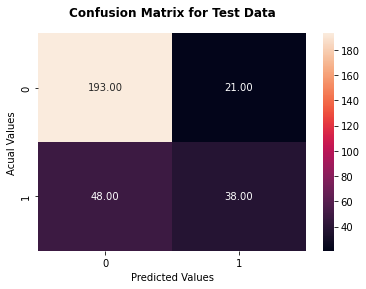

In [84]:
sns.heatmap(confusion_matrix(y_test,y_test_predict_rfcl),annot=True,fmt='.2f');
plt.title('Confusion Matrix for Test Data',weight='bold',y=1.05)
plt.xlabel('Predicted Values')
plt.ylabel('Acual Values')
plt.show()

* The accuracy in RandomForest model is slightly improved when compared to all the other models.

**Recall which is an important metric is very poor in all the modles**

**Bagging Classifiers in general benift having complex individual models while Boosting classifiers generally benifit from having simple models**

### Open for any corrections

## <Center>Thankyou